In [1]:
from load_data import load
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, SpatialDropout2D, BatchNormalization
from tensorflow.keras import regularizers

In [3]:
(train_data, train_labels, test_data, test_labels) = load()

In [52]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, dilation_rate=2, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, dilation_rate=4, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, dilation_rate=4, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, dilation_rate=4, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [53]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_139 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_42 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_43 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 28, 28, 64)      

In [58]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
es_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
sm_cb = tf.keras.callbacks.ModelCheckpoint(monitor='val_loss', filepath='../models/dilated_weights.hdf5', verbose=1, save_best_only=True)
history = model.fit(train_data, train_labels, epochs=30, verbose=2, validation_split=0.2, shuffle=True, callbacks=[es_cb, sm_cb])

Train on 40000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: val_loss improved from inf to 0.69719, saving model to ../models/dilated_weights.hdf5
40000/40000 - 44s - loss: 0.5493 - accuracy: 0.8196 - val_loss: 0.6972 - val_accuracy: 0.7840
Epoch 2/30

Epoch 00002: val_loss improved from 0.69719 to 0.66492, saving model to ../models/dilated_weights.hdf5
40000/40000 - 41s - loss: 0.4891 - accuracy: 0.8371 - val_loss: 0.6649 - val_accuracy: 0.7846
Epoch 3/30

Epoch 00003: val_loss improved from 0.66492 to 0.65351, saving model to ../models/dilated_weights.hdf5
40000/40000 - 41s - loss: 0.4292 - accuracy: 0.8573 - val_loss: 0.6535 - val_accuracy: 0.7954
Epoch 4/30

Epoch 00004: val_loss did not improve from 0.65351
40000/40000 - 41s - loss: 0.3778 - accuracy: 0.8740 - val_loss: 0.6657 - val_accuracy: 0.7894
Epoch 5/30

Epoch 00005: val_loss did not improve from 0.65351
40000/40000 - 41s - loss: 0.3452 - accuracy: 0.8858 - val_loss: 0.6894 - val_accuracy: 0.7843
Epoch 6/30

E

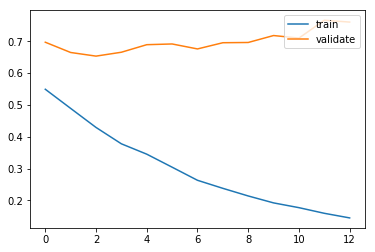

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validate'], loc='upper right')

In [61]:
test_labels = np.array(test_labels, dtype='uint8')
model.load_weights('../models/dilated_weights.hdf5')
model.evaluate(test_data, test_labels, verbose=0)

[0.6606714898586273, 0.7985]